In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from fbprophet import Prophet

In [20]:
df = pd.read_excel('temp medie.xlsx')
df

,ds,y
0,2015-01-01,-18.5
1,2015-01-02,-12.0
2,2015-01-03,-6.5
3,2015-01-04,-4.0
4,2015-01-05,-2.5
...,...,...
2187,2020-12-27,4.0
2188,2020-12-28,5.0
2189,2020-12-29,13.0
2190,2020-12-30,14.0


In [21]:
# fit model
m = Prophet()
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
#facem predictia cu coloana ds pe viitor cu 365 de zile
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2552,2021-12-27
2553,2021-12-28
2554,2021-12-29
2555,2021-12-30
2556,2021-12-31


In [23]:
# face preveziuni pentru valori joase si valori inalte
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2552,2021-12-27,5.148327,-0.026204,10.398096
2553,2021-12-28,5.004902,-0.362443,10.459371
2554,2021-12-29,4.668802,-0.467801,9.807092
2555,2021-12-30,4.414650,-0.708858,9.584154
2556,2021-12-31,4.191795,-0.649455,9.081953


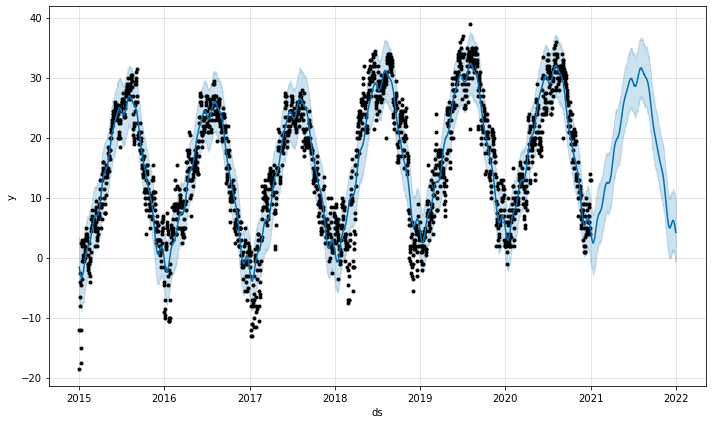

In [24]:
# afisam prognoza
fig1 = m.plot(forecast)
plt.savefig("temperaturi_medii.png")

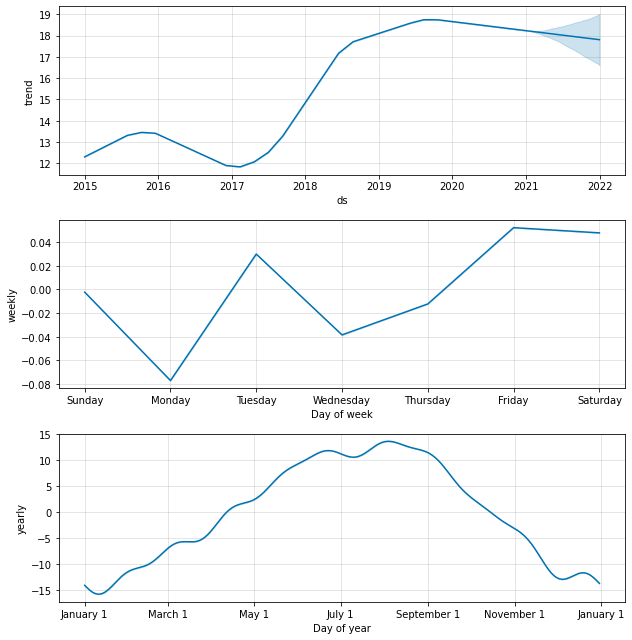

In [25]:
fig2 = m.plot_components(forecast)
plt.savefig("grafic_medie.png")

In [26]:
import pickle

In [27]:
forecast.to_excel('temperaturi_medii_prophet.xlsx')

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,12.307574,-6.354646,3.433411,12.307574,12.307574,-13.895420,-13.895420,-13.895420,-0.012234,-0.012234,-0.012234,-13.883186,-13.883186,-13.883186,0.0,0.0,0.0,-1.587847
1,2015-01-02,12.312353,-6.994890,3.335381,12.312353,12.312353,-14.115384,-14.115384,-14.115384,0.052171,0.052171,0.052171,-14.167555,-14.167555,-14.167555,0.0,0.0,0.0,-1.803030
2,2015-01-03,12.317132,-7.349635,2.805665,12.317132,12.317132,-14.395124,-14.395124,-14.395124,0.047778,0.047778,0.047778,-14.442901,-14.442901,-14.442901,0.0,0.0,0.0,-2.077991
3,2015-01-04,12.321912,-7.031416,2.635819,12.321912,12.321912,-14.705809,-14.705809,-14.705809,-0.002279,-0.002279,-0.002279,-14.703530,-14.703530,-14.703530,0.0,0.0,0.0,-2.383897
4,2015-01-05,12.326691,-7.750084,2.440922,12.326691,12.326691,-15.020967,-15.020967,-15.020967,-0.076936,-0.076936,-0.076936,-14.944031,-14.944031,-14.944031,0.0,0.0,0.0,-2.694276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,17.811773,-0.026204,10.398096,16.650674,18.995728,-12.663447,-12.663447,-12.663447,-0.076936,-0.076936,-0.076936,-12.586510,-12.586510,-12.586510,0.0,0.0,0.0,5.148327
2553,2021-12-28,17.810611,-0.362443,10.459371,16.643753,19.001595,-12.805709,-12.805709,-12.805709,0.029882,0.029882,0.029882,-12.835591,-12.835591,-12.835591,0.0,0.0,0.0,5.004902
2554,2021-12-29,17.809449,-0.467801,9.807092,16.634886,19.004463,-13.140646,-13.140646,-13.140646,-0.038382,-0.038382,-0.038382,-13.102264,-13.102264,-13.102264,0.0,0.0,0.0,4.668802
2555,2021-12-30,17.808286,-0.708858,9.584154,16.627350,19.006809,-13.393637,-13.393637,-13.393637,-0.012234,-0.012234,-0.012234,-13.381403,-13.381403,-13.381403,0.0,0.0,0.0,4.414650
